In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import linear_model
dframe = pd.read_csv("/Users/gayatrihungund/Downloads/Data/Stocks/pbt.us.txt")
df = pd.DataFrame(dframe)
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,9.665,9.823,9.632,9.769,121764,0
1,2005-02-28,9.828,9.991,9.701,9.889,188750,0
2,2005-03-01,9.932,9.939,9.701,9.850,127868,0
3,2005-03-02,9.896,9.965,9.762,9.896,103757,0
4,2005-03-03,9.953,10.146,9.889,10.019,138854,0


In [2]:
print(df.isna().sum())
df = df.drop(columns=['Date','OpenInt'])

#df = df.dropna(inplace=False)


Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


In [3]:
df
# df_train = df[:1059]
# df_test = df[1059:]
#print(df_train)


#print(df_train)

,Open,High,Low,Close,Volume
0,9.6650,9.8230,9.6320,9.7690,121764
1,9.8280,9.9910,9.7010,9.8890,188750
2,9.9320,9.9390,9.7010,9.8500,127868
3,9.8960,9.9650,9.7620,9.8960,103757
4,9.9530,10.1460,9.8890,10.0190,138854
5,10.0400,10.1900,10.0190,10.1260,143282
6,10.1900,10.1900,9.9030,10.0560,131988
7,10.0560,10.1460,9.9390,10.0050,114744
8,9.9650,10.2020,9.9530,9.9530,127868
9,9.9840,10.0190,8.9330,9.2686,400998


In [4]:
#remove the target value from the dataset
y = df.pop("Close")
print(y)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=1)
print(y_train)



0        9.7690
1        9.8890
2        9.8500
3        9.8960
4       10.0190
5       10.1260
6       10.0560
7       10.0050
8        9.9530
9        9.2686
10       9.5690
11       9.4286
12       9.5350
13       9.7160
14      10.0250
15       9.9910
16       9.7750
17       9.7890
18       9.1885
19       9.3172
20       8.9965
21       8.4633
22       8.3007
23       9.1010
24       9.1750
25       9.1750
26       9.0384
27       9.1750
28       8.9785
29       8.8437
         ...   
3171     8.6030
3172     8.6727
3173     8.7821
3174     8.9511
3175     8.9611
3176     9.1202
3177     9.1003
3178     9.2595
3179     9.2396
3180     9.2197
3181     9.1501
3182     9.1501
3183     9.1501
3184     9.1103
3185     9.0904
3186     9.0705
3187     9.1501
3188     9.1998
3189     9.0705
3190     9.1600
3191     9.0800
3192     9.2100
3193     9.2200
3194     9.2900
3195     9.4100
3196     9.5200
3197     9.6700
3198     9.8000
3199     9.7600
3200     9.5900
Name: Close, Length: 320

In [5]:

#check the statistical distribution of data before normalizing the data 
#this wil help to know the minimum and maximum in the data
train_stats = X_train.describe()
train_stats
# train_stats.pop("Close")
train_stats = train_stats.transpose()
# train_stats

# #df_train


          Open      High       Low    Volume
2068  0.320218  0.322830  0.287913  0.119405
2423  0.030257  0.025459  0.088747  0.167027
2225  0.018265  0.005119  0.042775  0.002690
1918  0.220377  0.177582  0.241165  0.315700
1781  2.051792  2.070336  2.130491  0.498564
2803  1.690898  1.622114  1.668000  0.678319
1342  0.815405  0.881508  0.872541  0.131359
1812  1.394015  1.387114  1.395671  0.043619
2874  1.502028  1.505193  1.493919  0.768935
1089  1.114695  1.113312  1.156138  0.189711
2451  0.056159  0.047979  0.008578  0.476029
877   1.749718  1.831699  1.792821  2.380591
1403  0.840942  0.833926  0.909116  0.511813
1316  0.395493  0.445278  0.390789  1.234396
2558  0.812694  0.780273  0.800292  0.639211
1281  0.466268  0.424211  0.489799  0.144545
2564  0.775044  0.758515  0.740073  0.563609
736   0.316691  0.321419  0.333525  0.164277
2774  1.695130  1.633229  1.659059  0.335365
735   0.363753  0.315970  0.333525  0.128033
2149  0.008367  0.018854  0.049055  0.632150
2385  0.57

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/gayatrihungund/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/g

0.015044306888255903
0.998017702061966
Linear Regression
0.011744418253233089
0.9984525085628926
Decision Tree Regressor
0.023842473263954597
0.9968584205347698


Text(0, 0.5, 'Predictions(Decision Tree)')

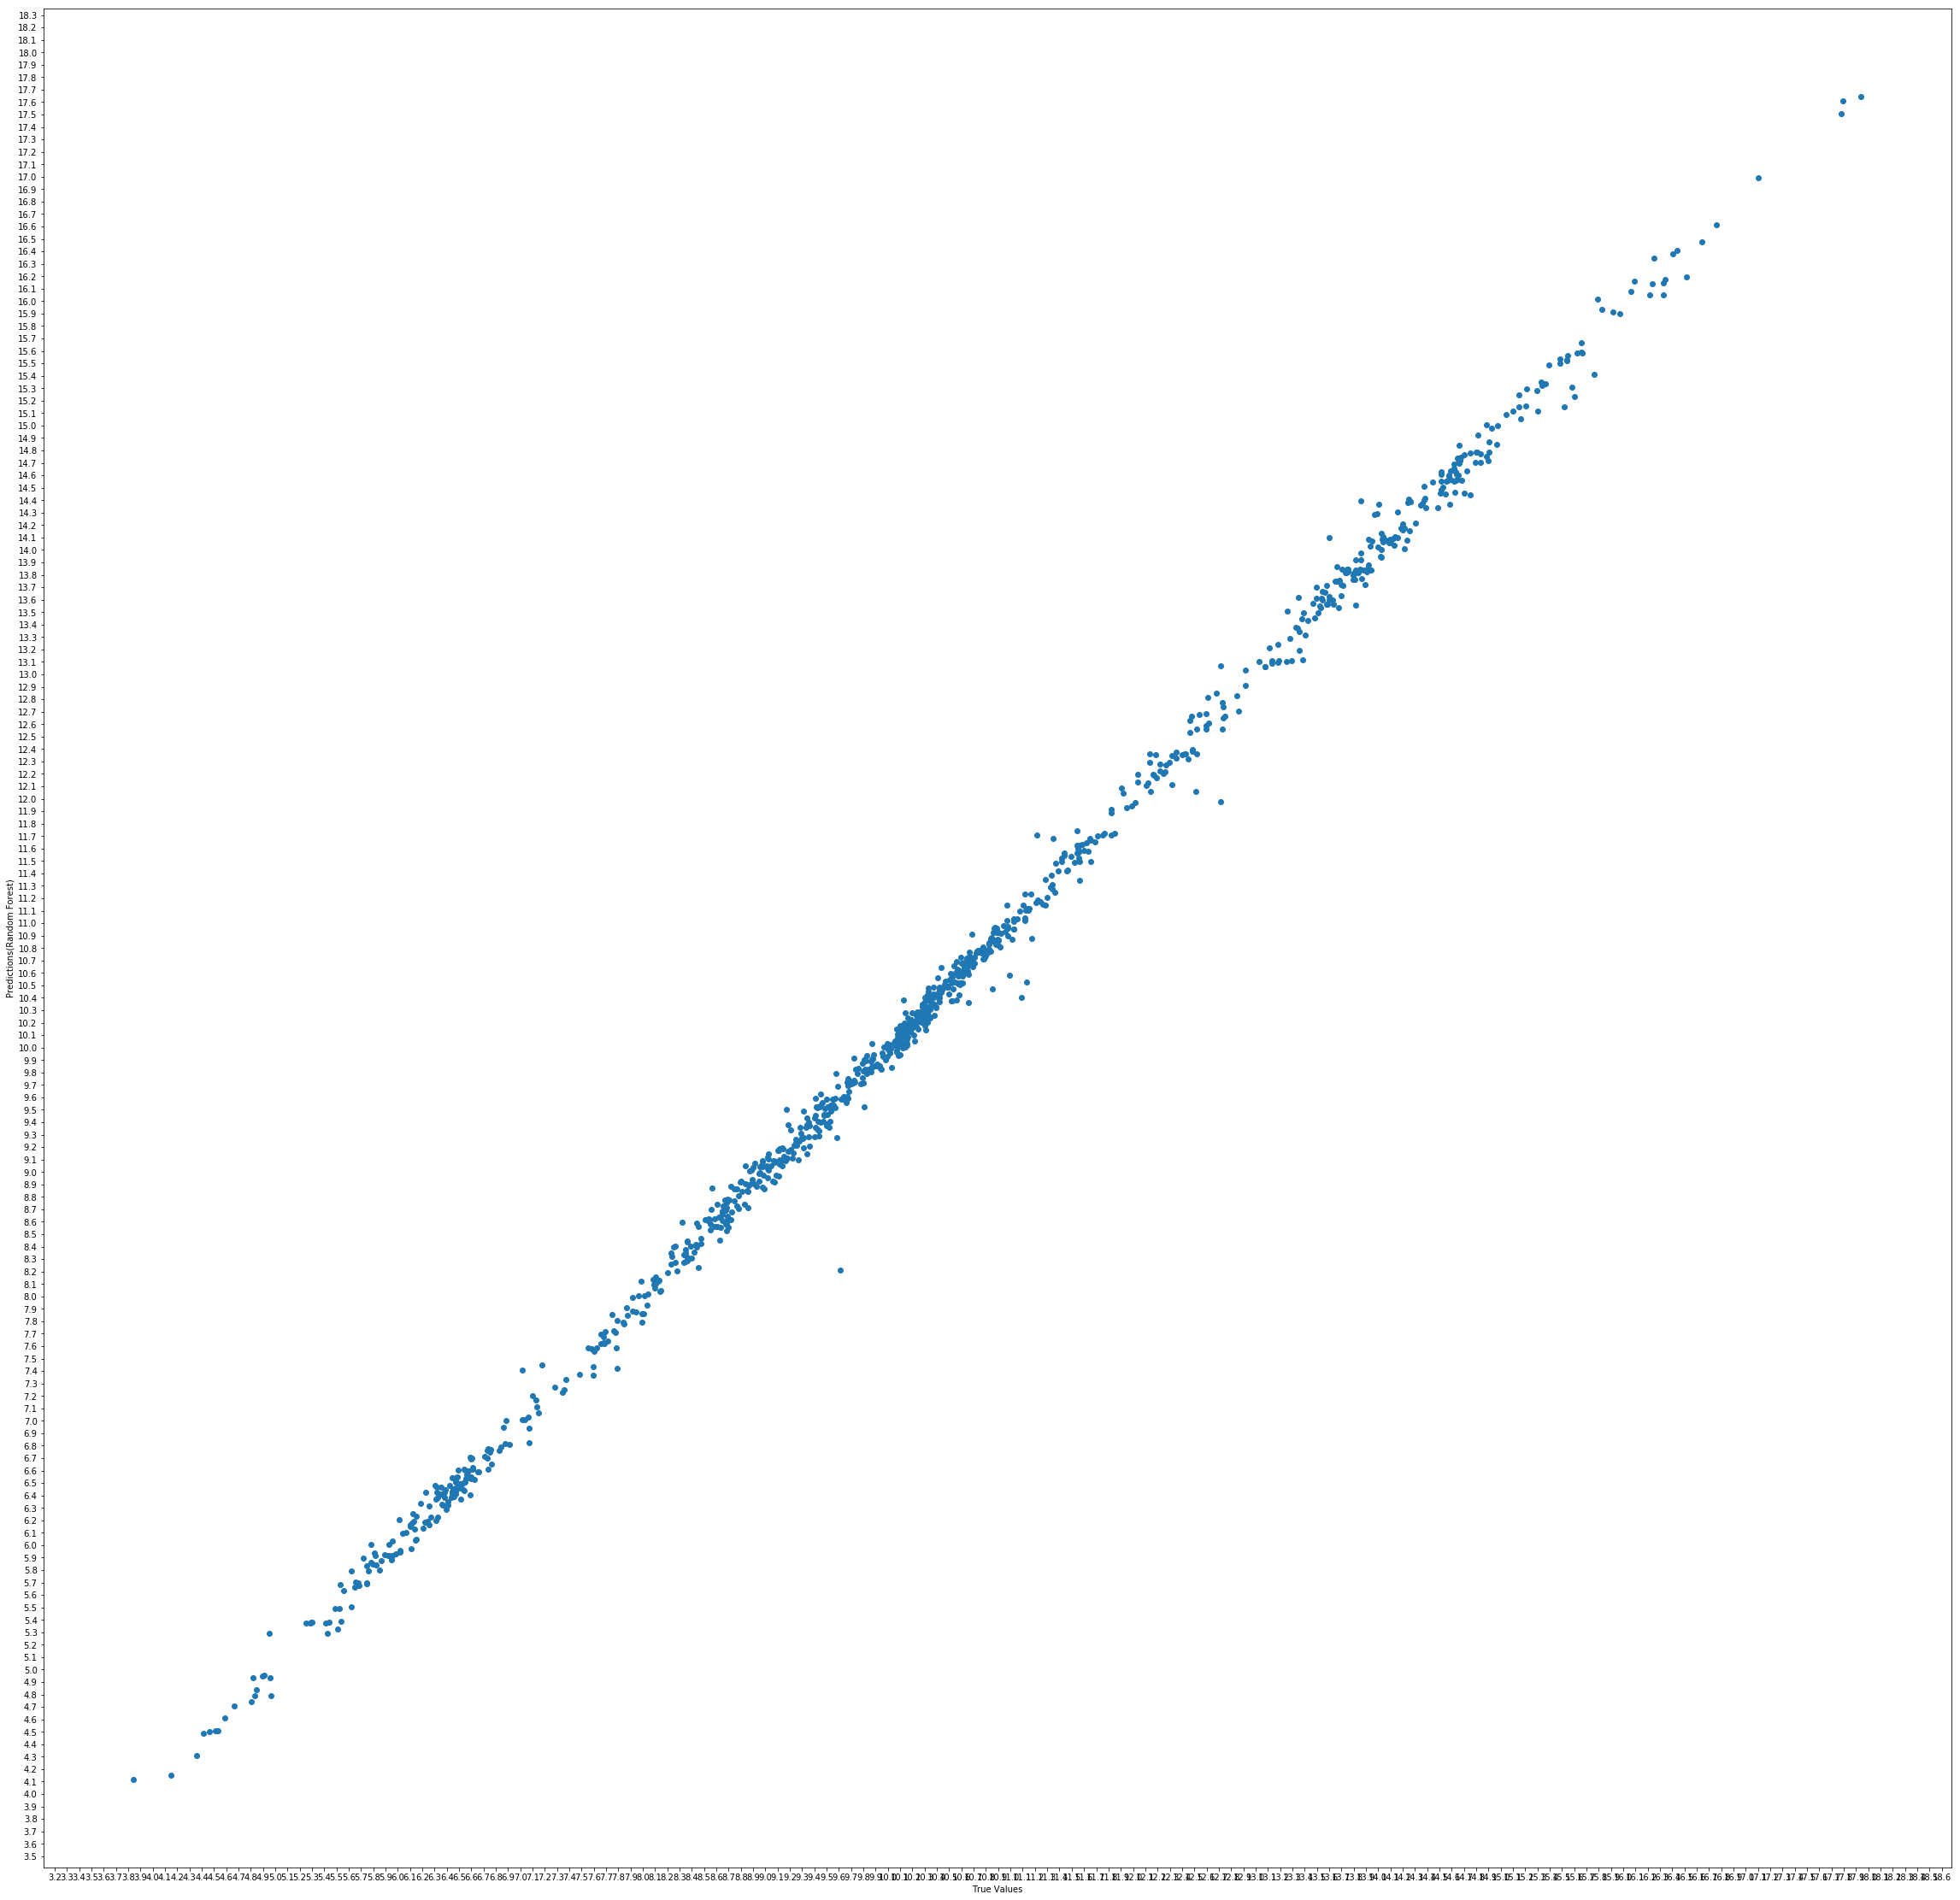

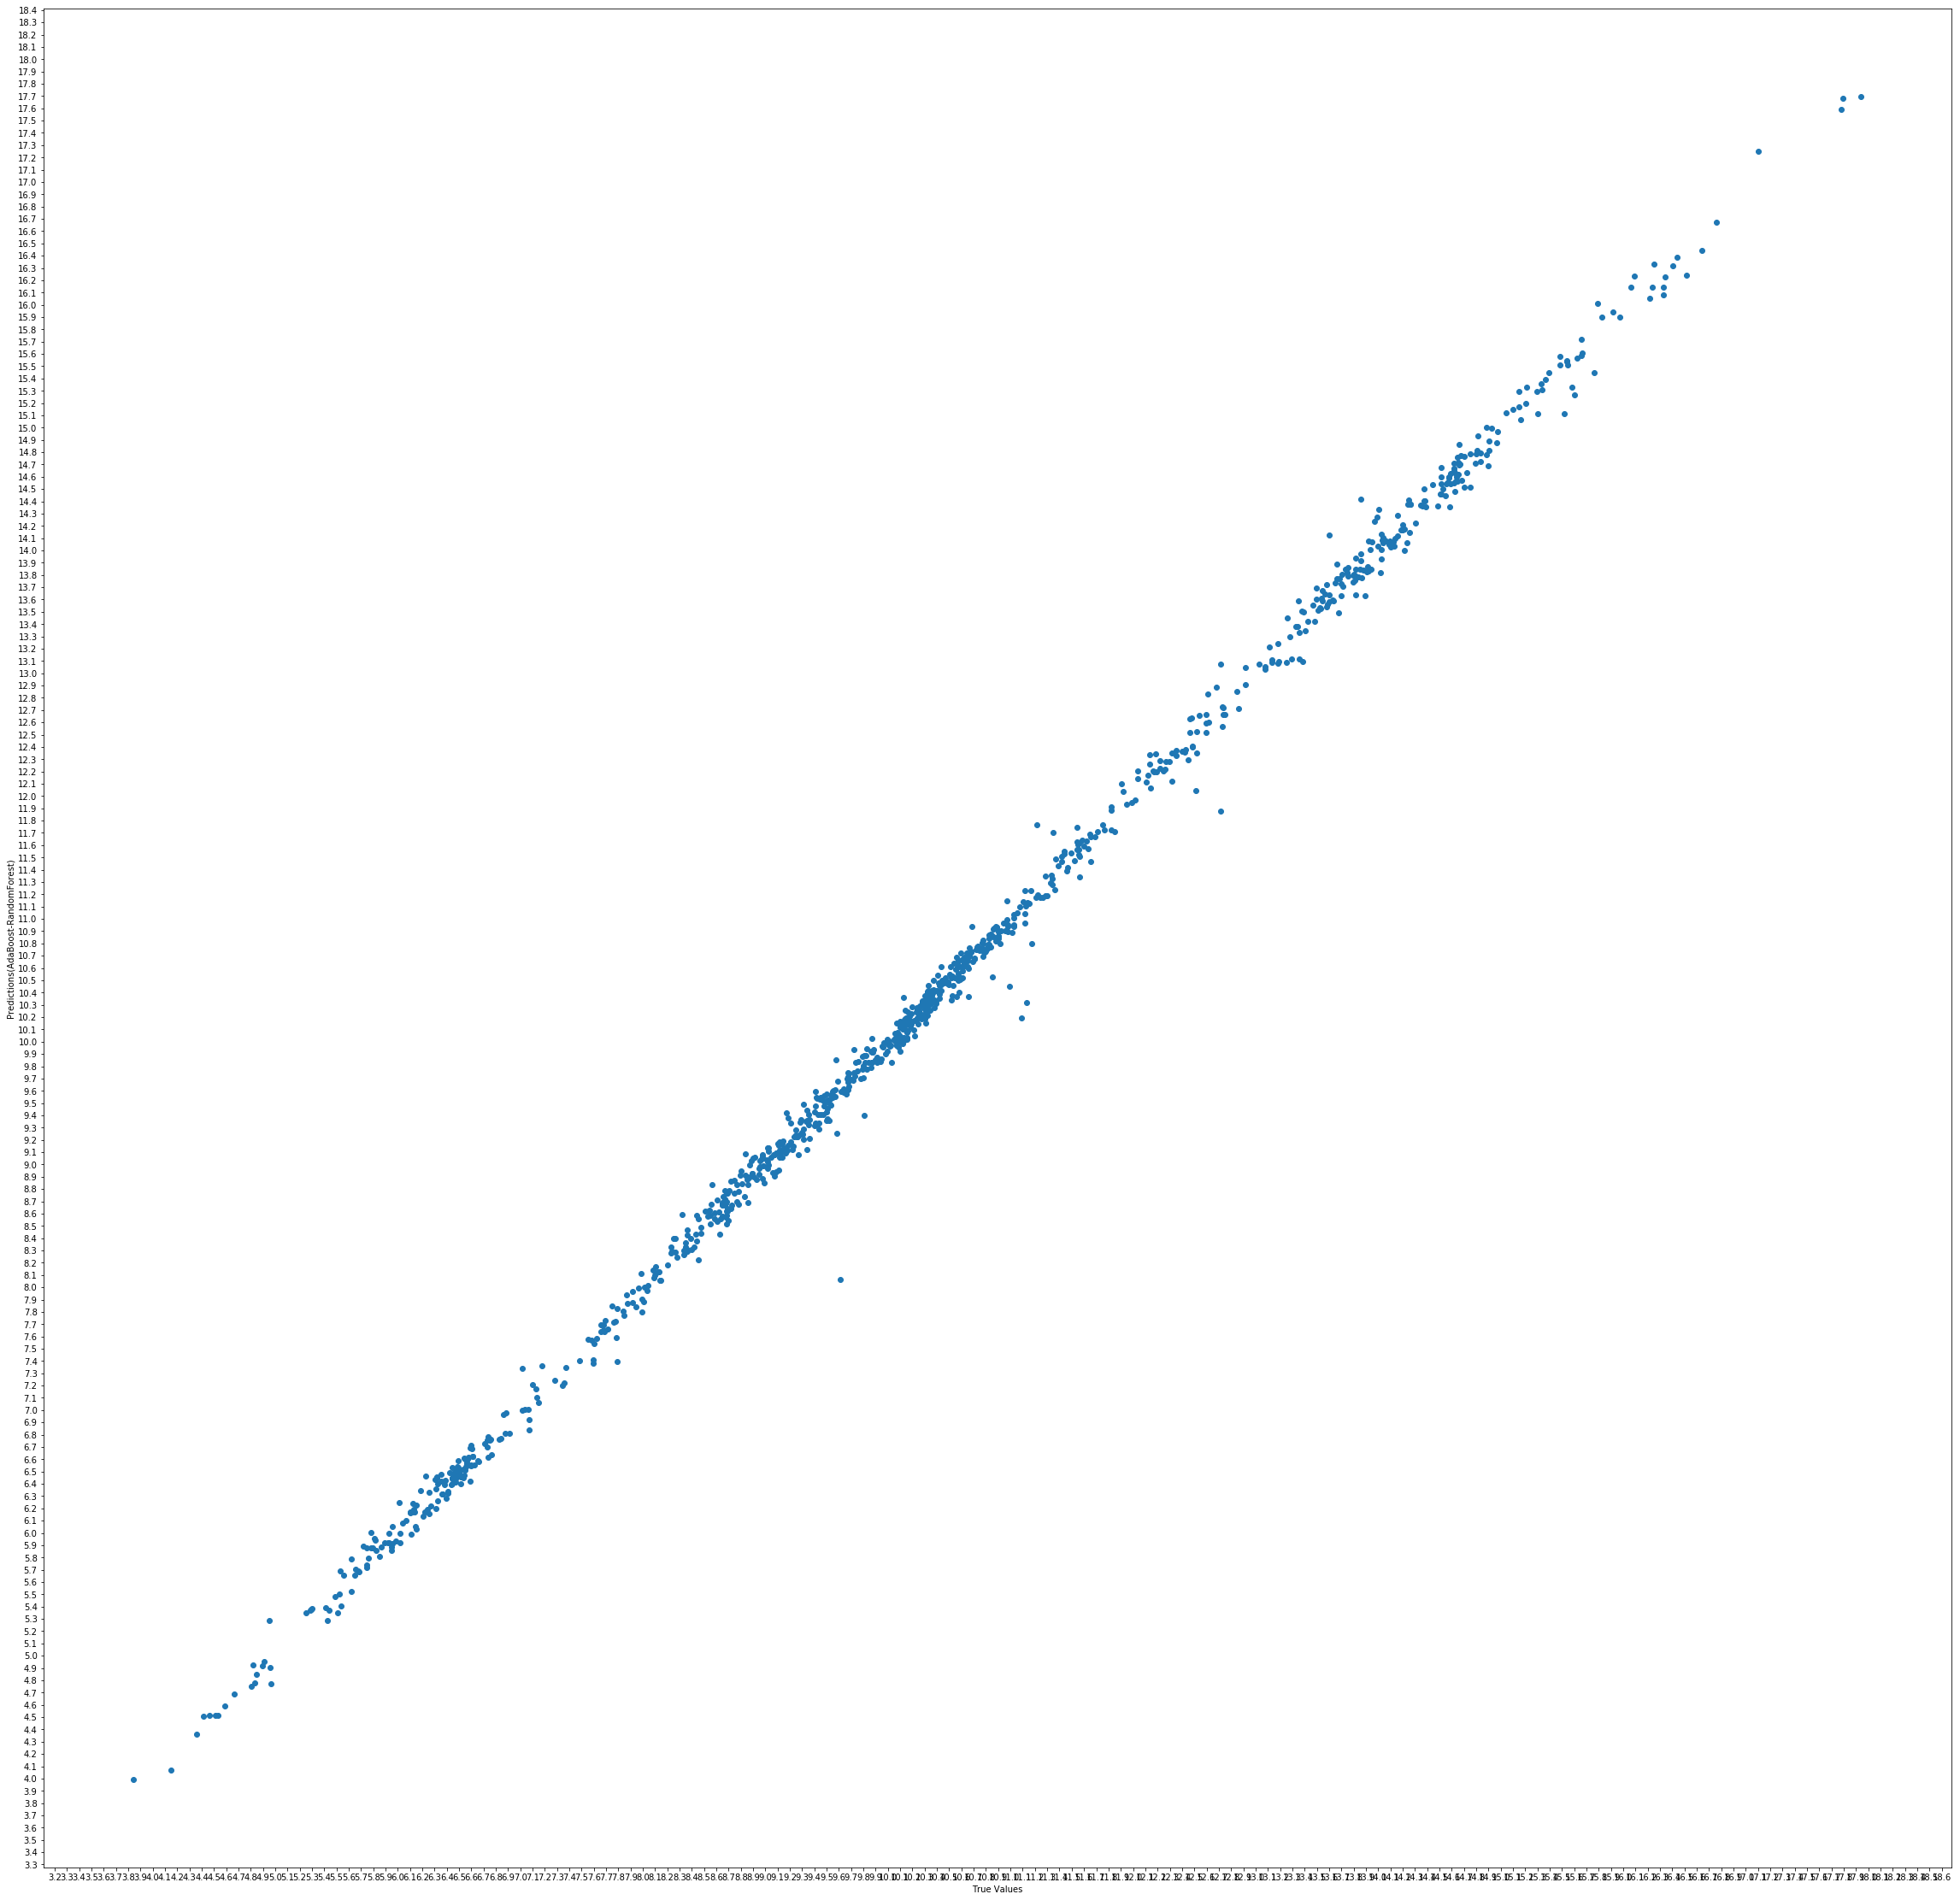

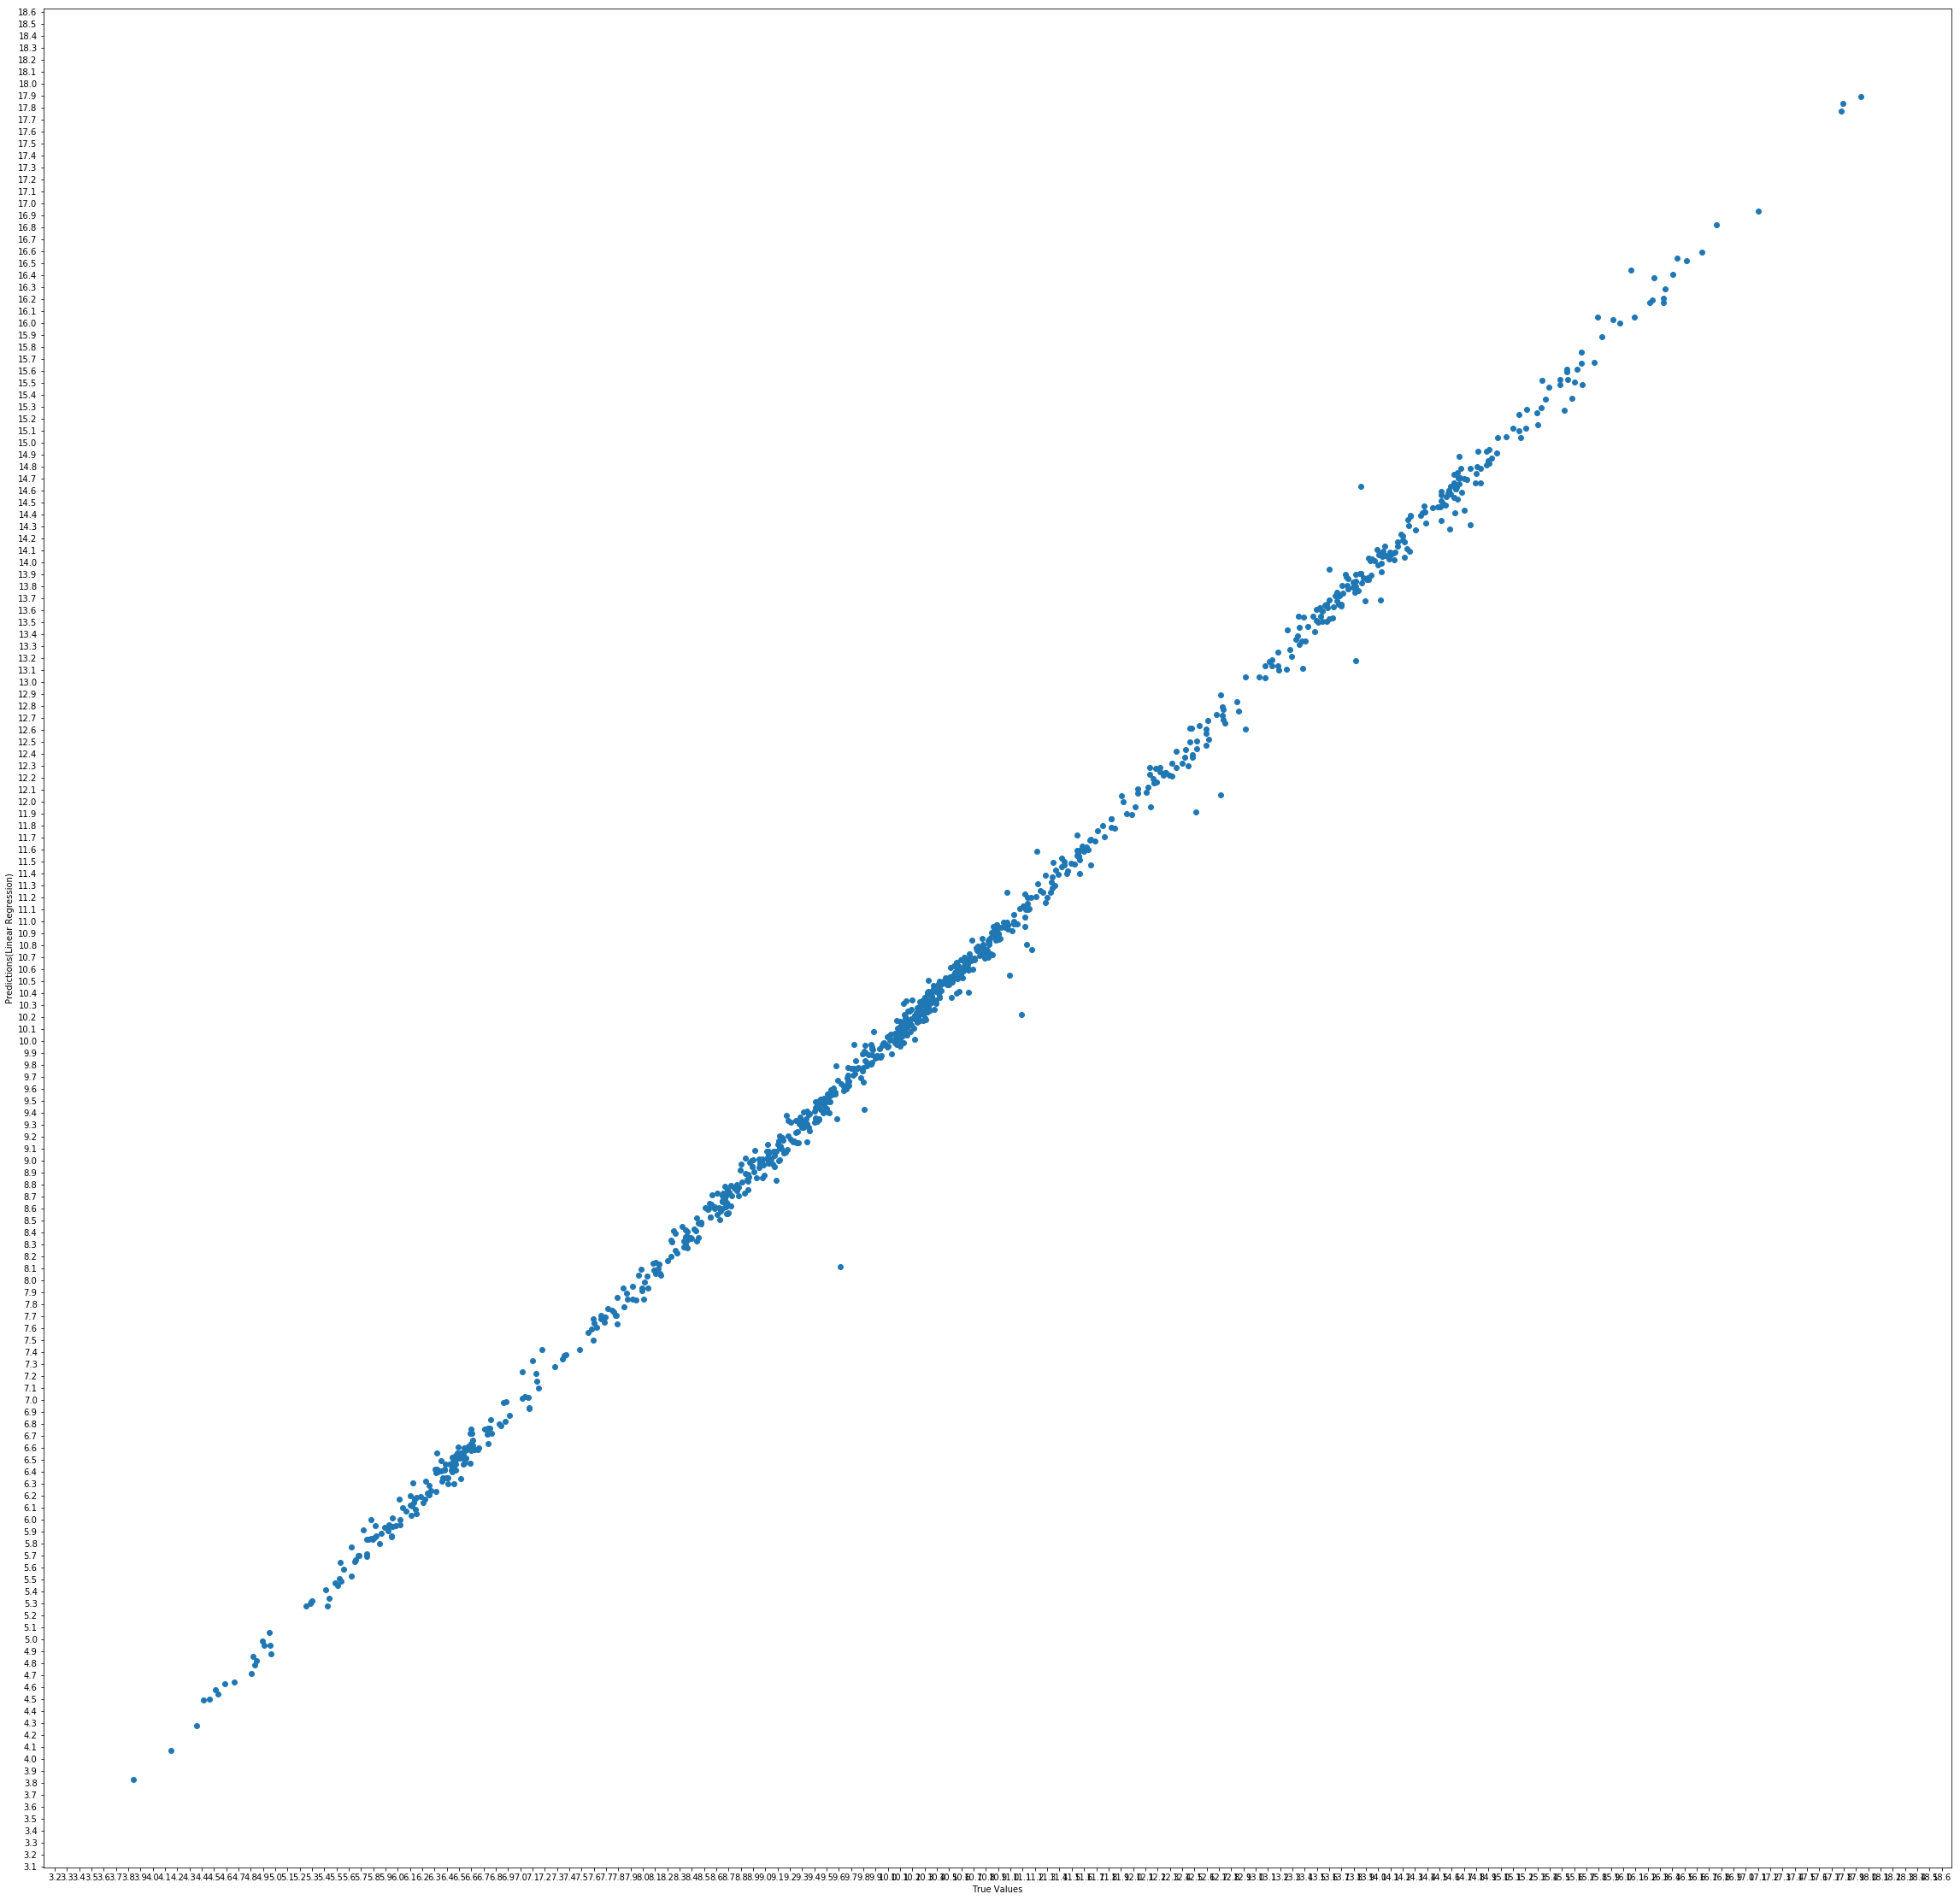

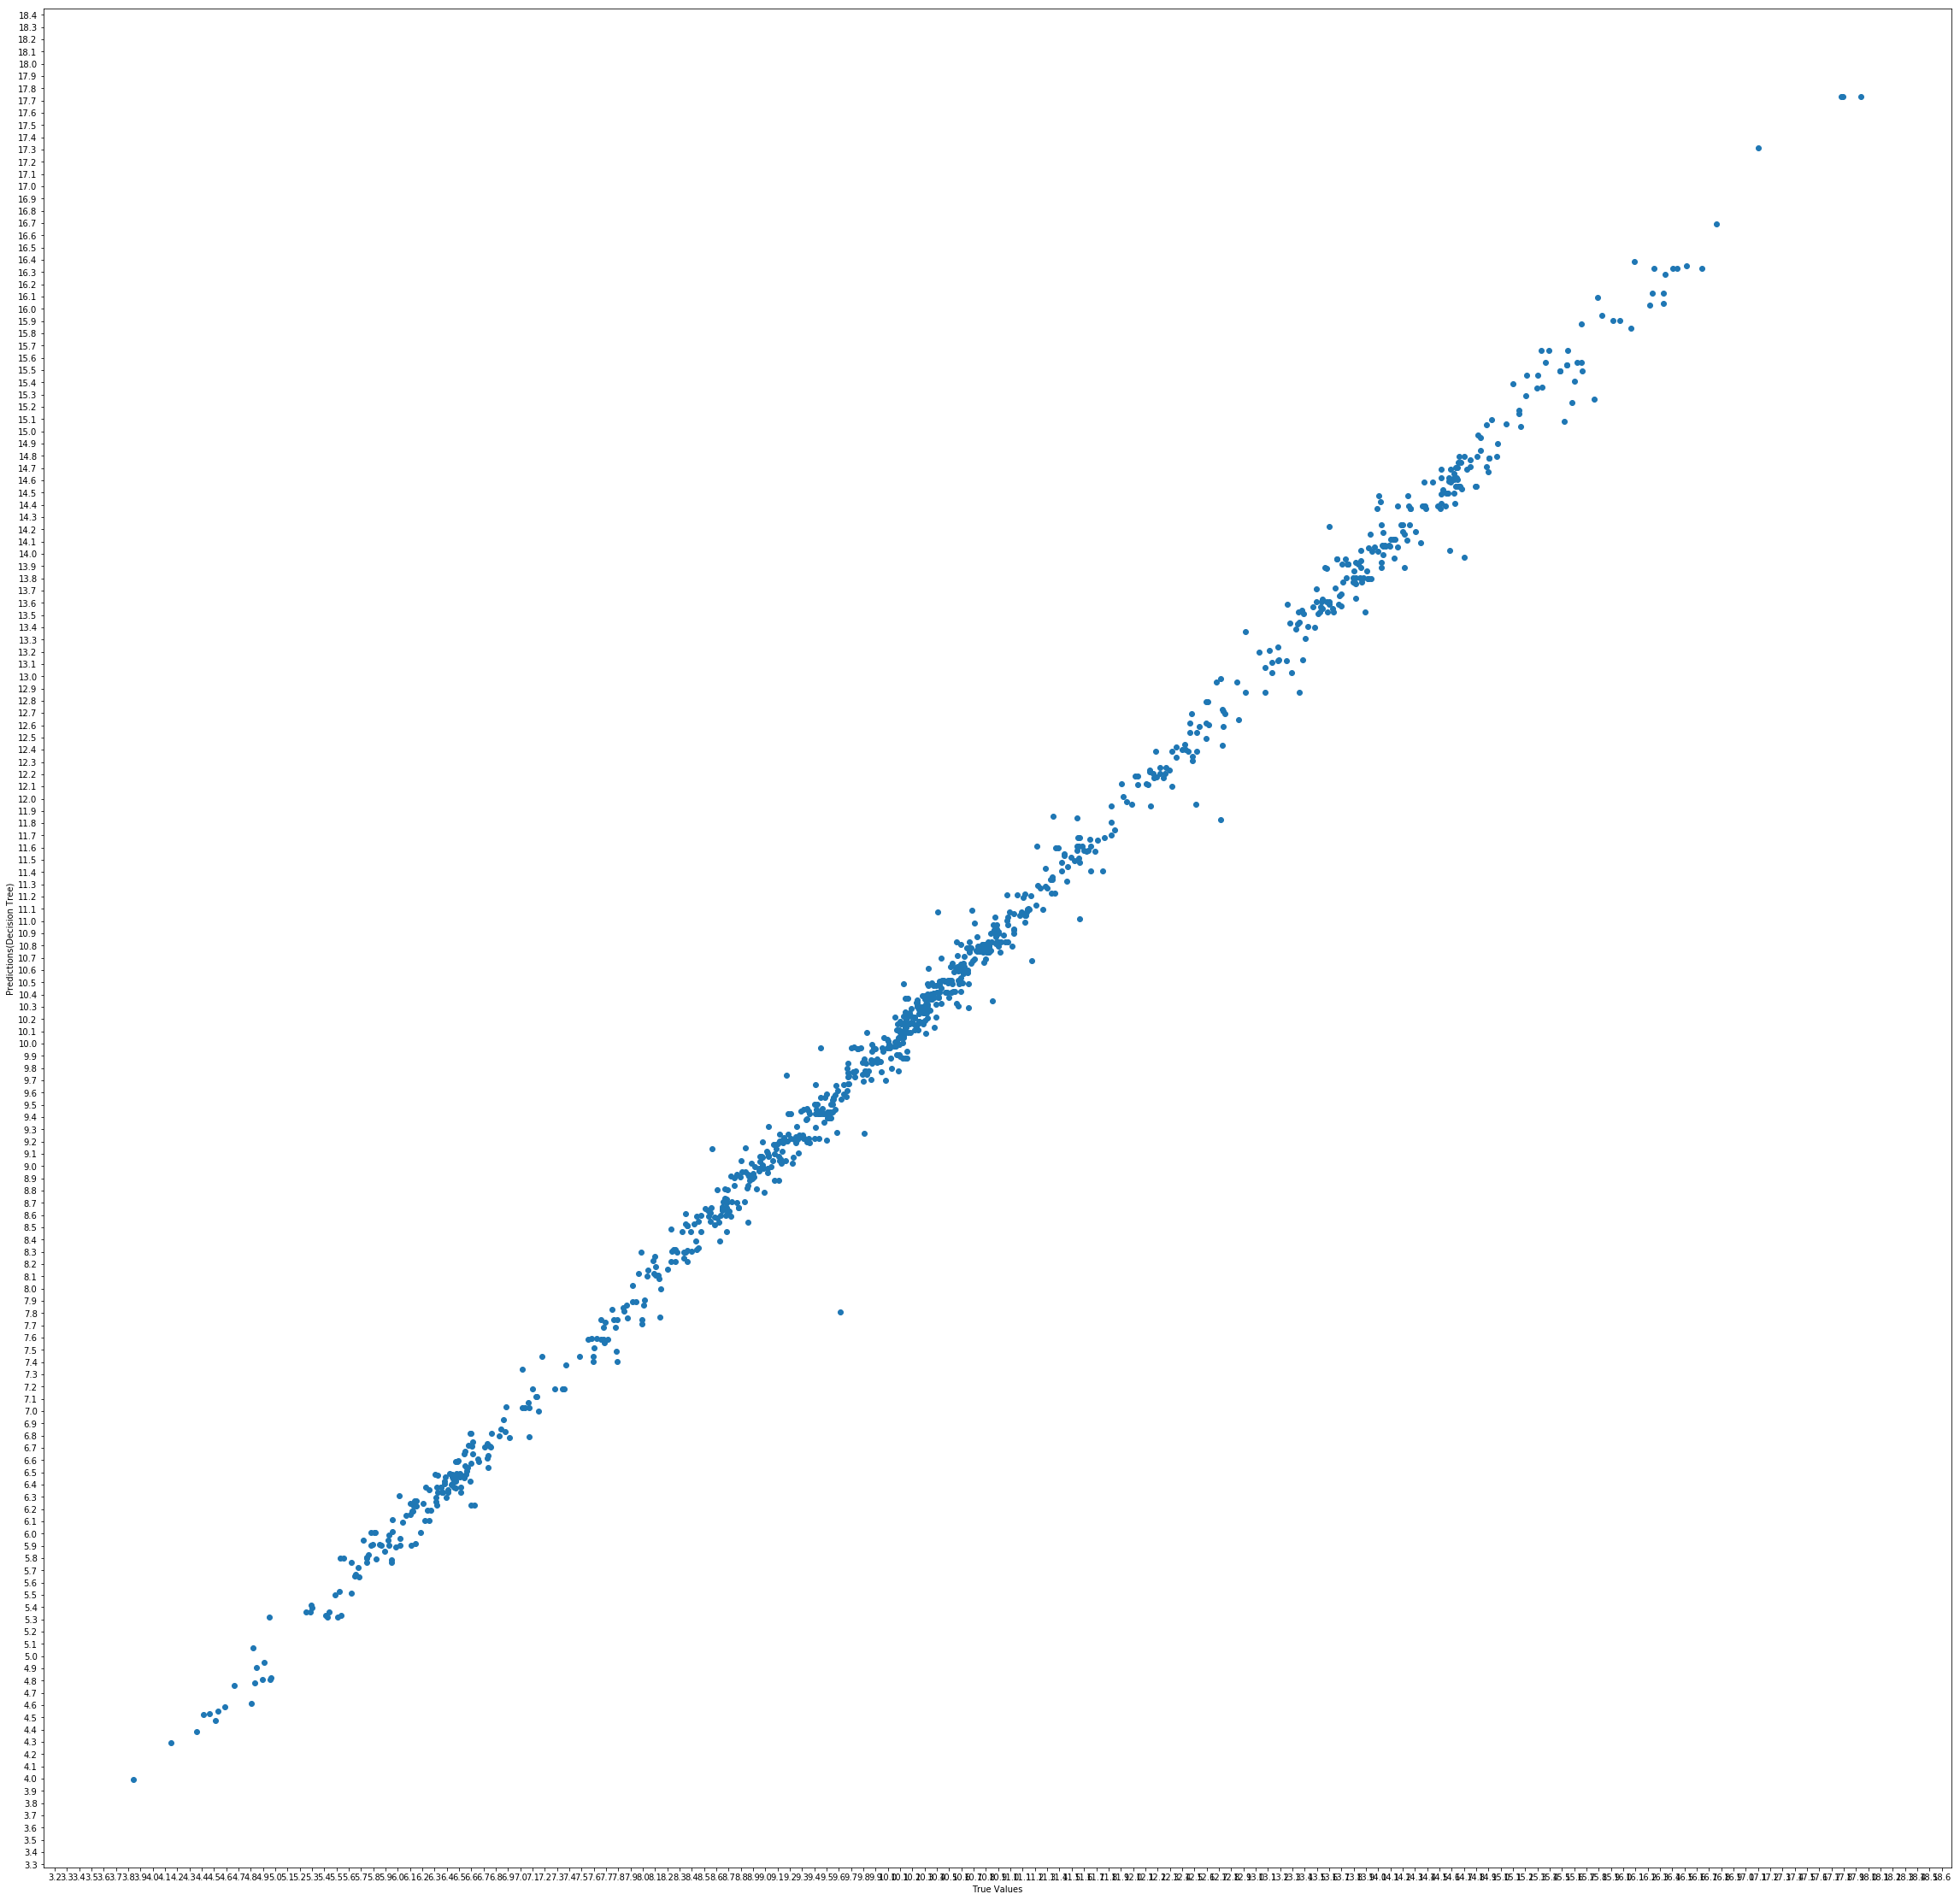

In [6]:
#normalize using z-score

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

def normalizeData(data):
    data=abs((data-train_stats['mean'])/train_stats['std'])
    return data


df_train_norm=normalizeData(X_train)
print(df_train_norm)

print("Random Forest")
random_forest = RandomForestRegressor(random_state=1,n_estimators=200)
random_forest.fit(X_train,y_train)
random_for_pred = random_forest.predict(X_test)
acc3 = mean_squared_error(y_test,random_for_pred)
print(acc3)
acc4 = r2_score(y_test,random_for_pred)
print(acc4)
plt.figure(figsize=(40,40))
plt.xticks(np.arange(0,19,step=0.1))
plt.yticks(np.arange(0,19,step=0.1))
# plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
# plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.scatter(y_test,random_for_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions(Random Forest)')


print("AdaBoost")
regr_ada = AdaBoostRegressor(RandomForestRegressor(),n_estimators=200,random_state=1)
regr_ada.fit(X_train,y_train)
regr_ada_pred = regr_ada.predict(X_test)
acc_ada_mse = mean_squared_error(y_test,regr_ada_pred)
print(acc_ada_mse)
r2_ada = r2_score(y_test,regr_ada_pred)
print(r2_ada)
plt.figure(figsize=(40,40))
plt.xticks(np.arange(0,19,step=0.1))
plt.yticks(np.arange(0,19,step=0.1))
plt.scatter(y_test,regr_ada_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions(AdaBoost-RandomForest)')

print("Linear Regression")
lin = linear_model.LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)
acc1 = mean_squared_error(y_test,y_pred)
print(acc1)
acc2 = r2_score(y_test,y_pred)
print(acc2)
plt.figure(figsize=(40,40))
plt.xticks(np.arange(0,19,step=0.1))
plt.yticks(np.arange(0,19,step=0.1))
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions(Linear Regression)')


print("Decision Tree Regressor")
from sklearn.tree import DecisionTreeRegressor
dtree_regressor = DecisionTreeRegressor(random_state=1)
dtree_regressor.fit(X_train,y_train)
dtree_pred=dtree_regressor.predict(X_test)
acc5 = mean_squared_error(y_test,dtree_pred)
print(acc5)
acc6 = r2_score(y_test,dtree_pred)
print(acc6)
plt.figure(figsize=(40,40))
plt.xticks(np.arange(0,19,step=0.1))
plt.yticks(np.arange(0,19,step=0.1))
plt.scatter(y_test,dtree_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions(Decision Tree)')







# acc2 = mean_squared_error(y_test,y_pred,normlize=False)
# print(acc2)






#Now, to normalize the data we can use the concept of finding z-score
# mean = df['Open']['mean']
# print(mean)

# #normalizing using the Z-score normalization (x-mean)/std
# def normalizeData(point):
    
    





# scaler = MinMaxScaler()
# # #here as we r extracting samples for predicting the value of closing stock price, we need to extract that column and reshape
# # #the values in the form of 2d array as required by the fit_transform method.
# df_scaled = scaler.fit(df)
# print(scaler.fit(df))
# print(scaler.transform(df))
# #df['Open','High','Low','Close'] = scaler.fit_transform()





# # X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1).values)

# # y_data = df_train['Close'].values.reshape(-1,1)
# # y_train = scaler.fit_transform(y_data)
# # print(y_train)